<font color='red'>**Scikit-learn**</font>

After understanding the math and coding behind the tools of ML, we may wonder if exists an easier way to implement those algorithms. There are many libraries that do exactly this job, the most important one for python is scikit-learn. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)

It's important to notice that algorithm like gradient discent follow exactly the same step that we saw earlier, so they work better for example with **normalized input** features (normalization that can be operated with other functions of the library too).

An useful tool to get a scrape of a dataset is **np.ptp()**, that stands for "numpy peak to peak function". This will compute the difference between the max and min of an array on a specific axis. 

In [3]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


After creating (and scraping) normalized scores of the dataset we can proceed creating the gradient discent (Stochastig Gradient Descent) that will give us the weights for the function that fits the data. 

In [5]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

SGDRegressor()
number of iterations completed: 124, number of weight updates: 12277.0
model parameters:                   w: [110.11 -21.04 -32.45 -38.05], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


And soo with very few line we created an extremely highly performance ML algorithm to predict the price of an house based on a real dataset!!! Let's play with that, we now have two possibilities:

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.19 485.91 389.62 492.07]
Target values 
[300.  509.8 394.  540. ]


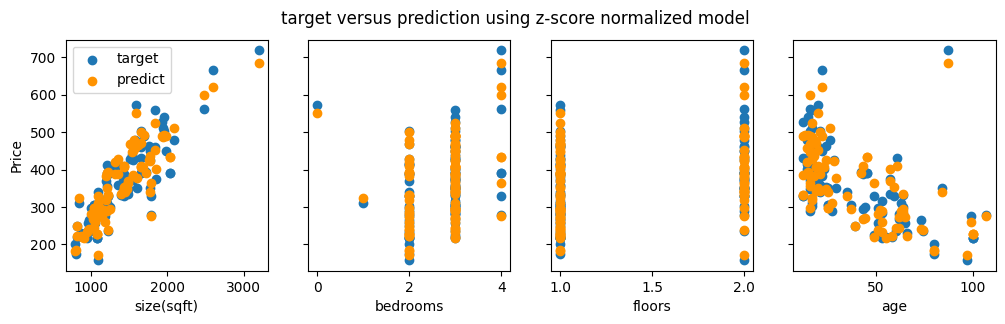

In [7]:
#1) make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
#2) make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()